In [1]:
# look for order of training set that is well-normalized
# and poorly normalized

In [2]:
from astropy.io import fits
import pandas as pd
%pylab inline
w = fits.open('./data/w_to_resample_to_i_chip.fits')[0].data
normalized_flux = fits.open('./training_flux.fits')[0].data


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [5]:
idx = (w>7850) & (w<7990)
flux_df = pd.read_csv('./training_flux.csv')

In [8]:
# how do I index the flux df the same way?
flux_df.iloc[idx]

,Unnamed: 0,K00006,K00007,K00008,K00010,K00017,K00018,K00020,K00022,K00046,...,K04792,K04829,K04833,K04839,K04850,K04881,K04907,K05236,K05900,K05949
36189,36189,0.959409,0.966135,0.965962,0.943751,0.979600,0.941529,0.970919,0.988172,0.957281,...,0.946326,0.948361,0.980821,0.964863,0.994016,0.947085,0.909093,0.921945,0.985522,0.896187
36190,36190,0.960037,0.973013,0.967757,0.939593,0.969450,0.946286,0.972489,0.980705,0.967866,...,0.932085,0.937551,0.979069,0.964218,0.982527,0.938882,0.935124,0.937641,0.983298,0.893666
36191,36191,0.963926,0.978338,0.969978,0.943947,0.950664,0.959302,0.982118,0.995447,0.975054,...,0.942052,0.947650,0.969107,0.961250,0.970839,0.958733,0.952681,0.943028,0.974219,0.900559
36192,36192,0.964476,0.978020,0.973843,0.962927,0.948258,0.966547,0.989848,1.001654,0.973583,...,0.954364,0.960810,0.960060,0.977921,0.967041,0.958572,0.949584,0.943681,0.979540,0.909446
36193,36193,0.963429,0.977745,0.976782,0.972407,0.961179,0.971007,0.992443,0.998482,0.974460,...,0.961057,0.965220,0.976656,0.988954,0.992029,0.945504,0.951020,0.938182,0.993196,0.924844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40205,40205,1.028851,1.059751,0.722093,1.104522,1.096732,1.005610,0.938717,0.932278,1.014866,...,1.143117,0.945001,0.972822,0.820839,0.605469,0.881782,0.962248,1.006870,0.971659,0.959754
40206,40206,1.068611,1.082692,0.783257,1.104711,1.122255,1.071226,0.939744,0.947818,1.053407,...,1.130637,0.927375,1.046386,0.823191,0.617316,0.893303,1.040843,1.098338,0.997327,1.018256
40207,40207,1.107336,1.099133,0.839757,1.098616,1.146260,1.104819,0.952274,0.970159,1.088841,...,1.097689,0.937961,1.048354,0.826699,0.648708,0.889549,1.101741,1.106704,1.036890,1.027885
40208,40208,1.110893,1.110322,0.849240,1.088188,1.134504,1.143052,0.975117,1.020532,1.104275,...,1.038526,0.923681,1.055975,0.807493,0.734765,0.887048,1.135951,1.108672,1.096633,1.037514


6543.0591124408675 6658.853101217269
6666.533220001781 6784.4406962592175
6794.7648283489425 6914.852174490056
6928.034187263506 7050.3701972702975
7066.644094157273 7191.3001665174515
7210.922167241274 7337.9725175609665
7361.223403959604 7490.745299723224
7517.933067174776 7650.007087479346
7681.469948979884 7816.18027250135
7852.290070879473 7989.724795835275


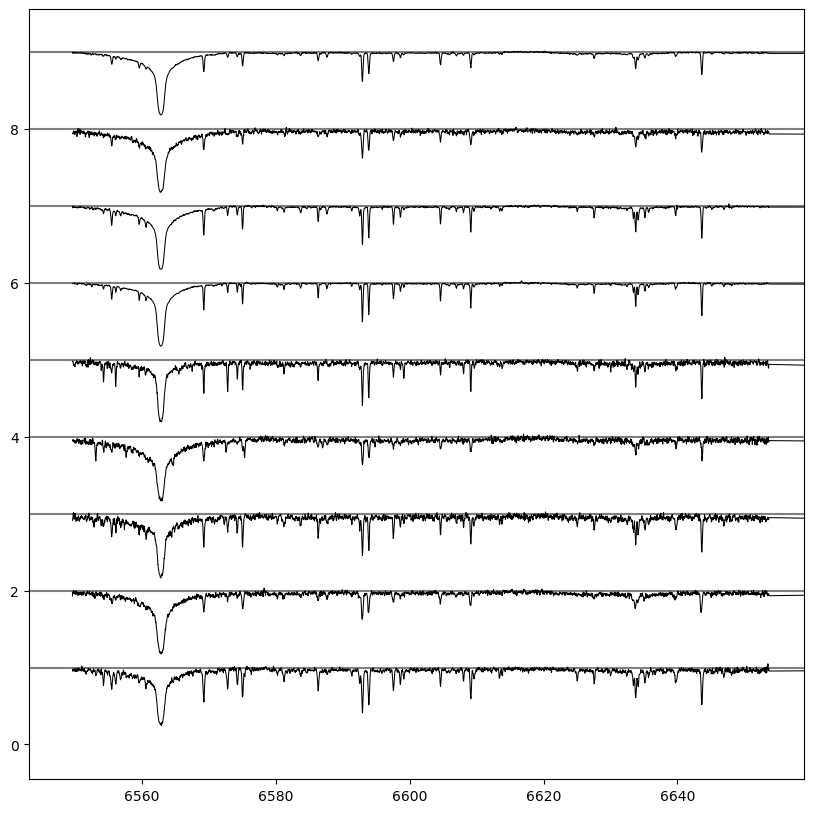

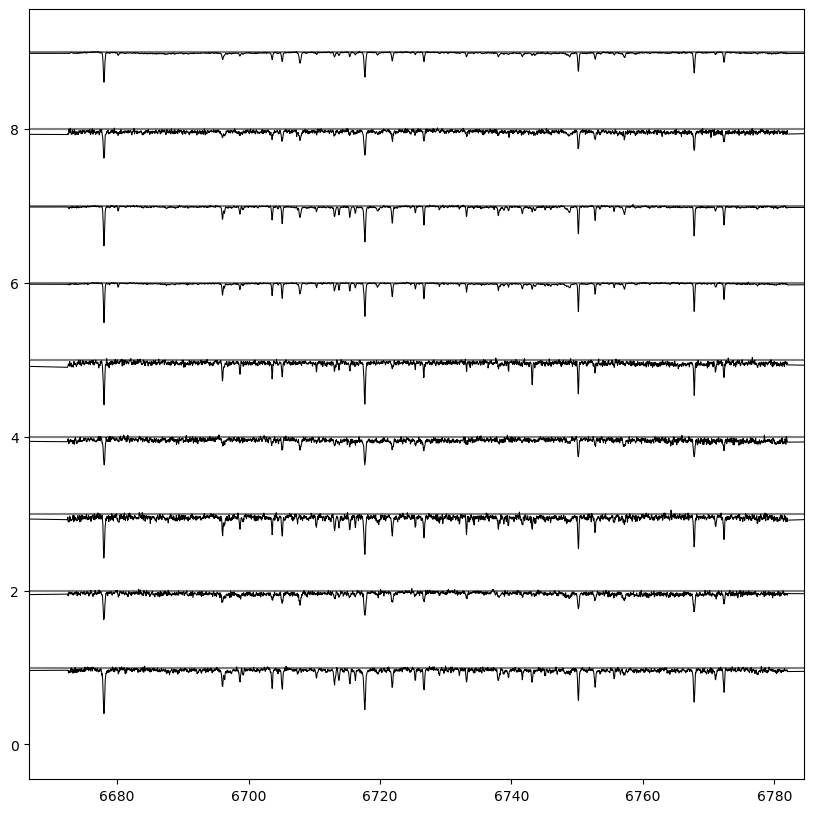

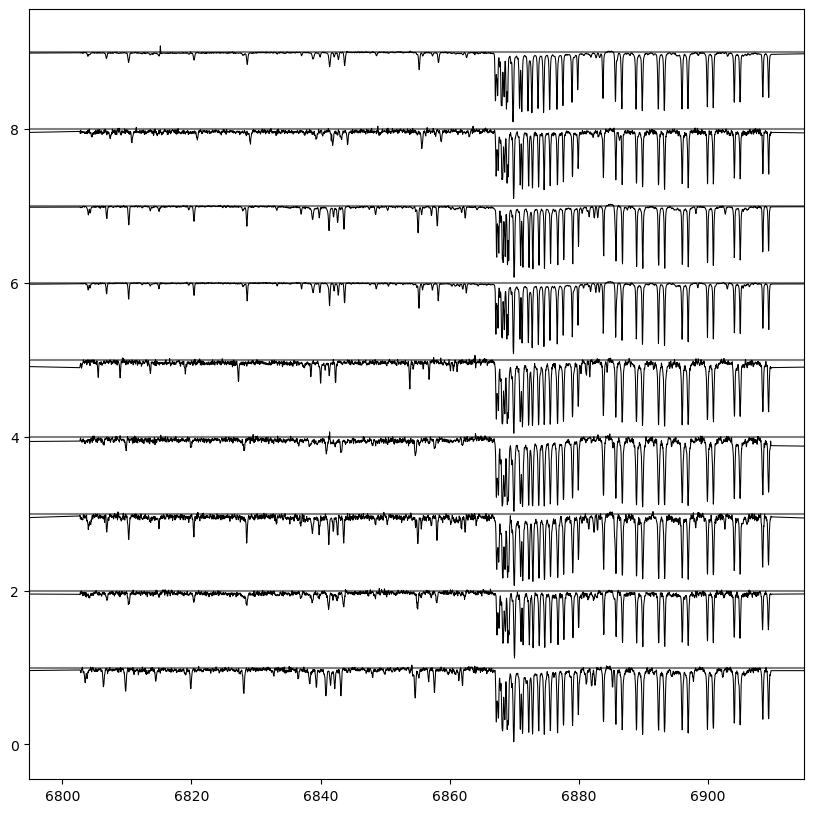

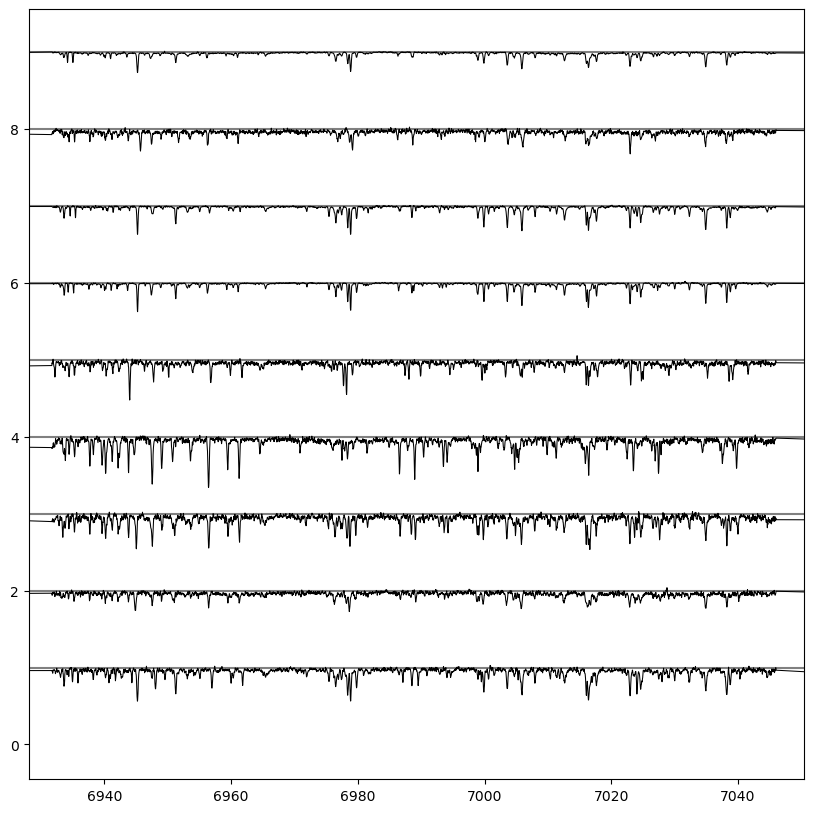

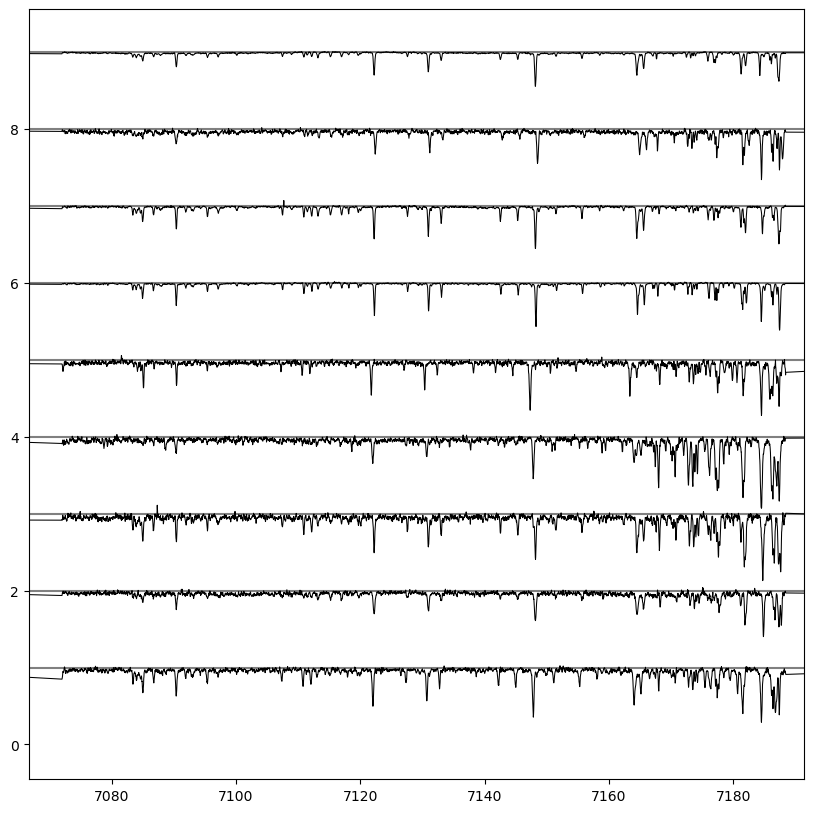

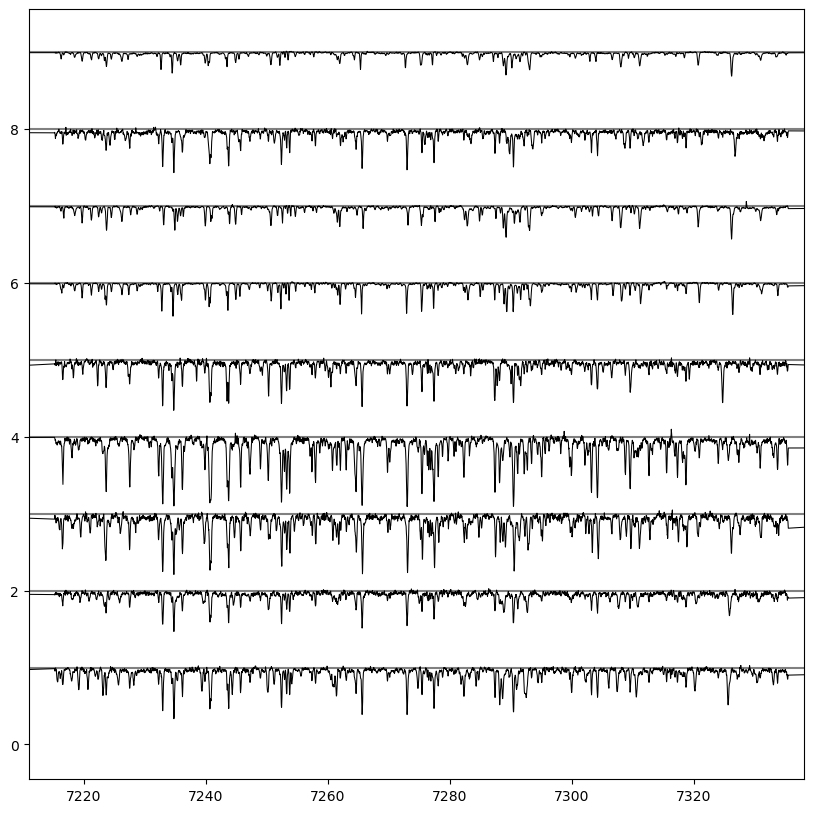

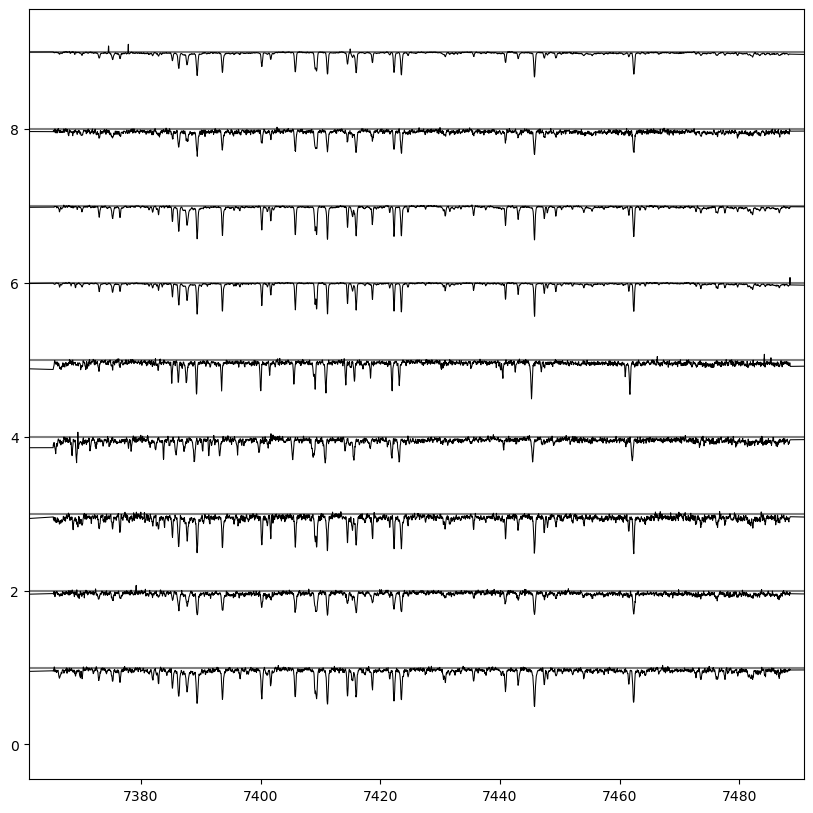

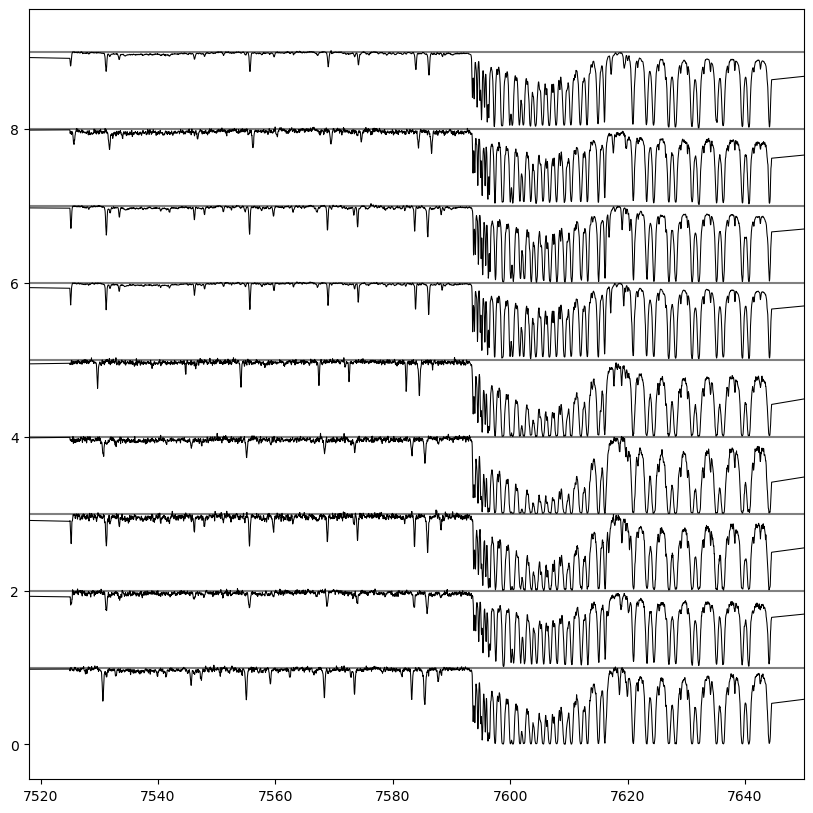

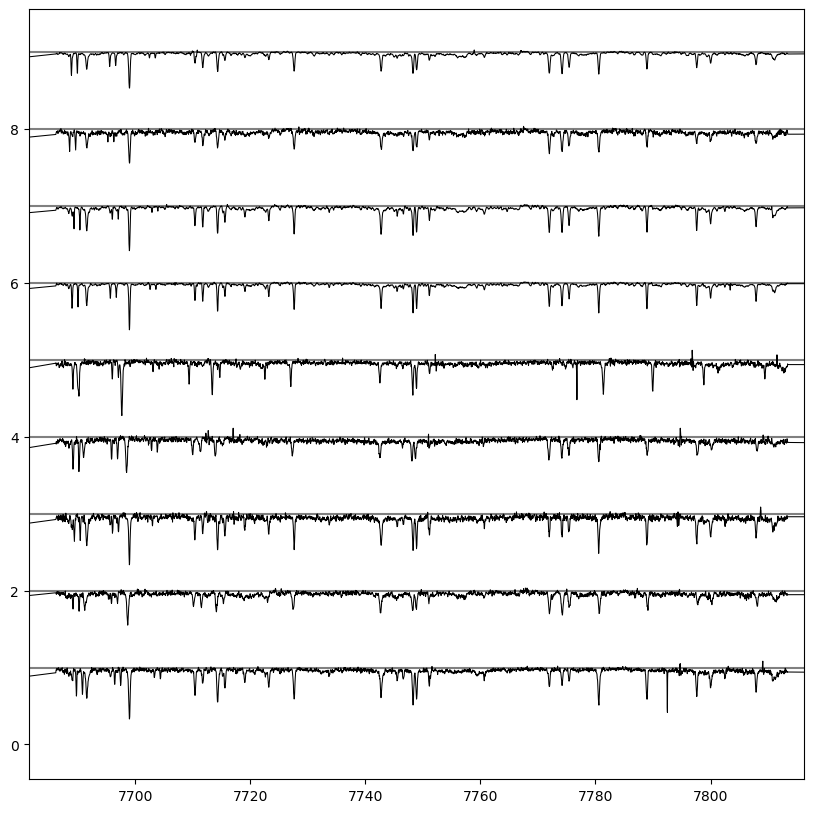

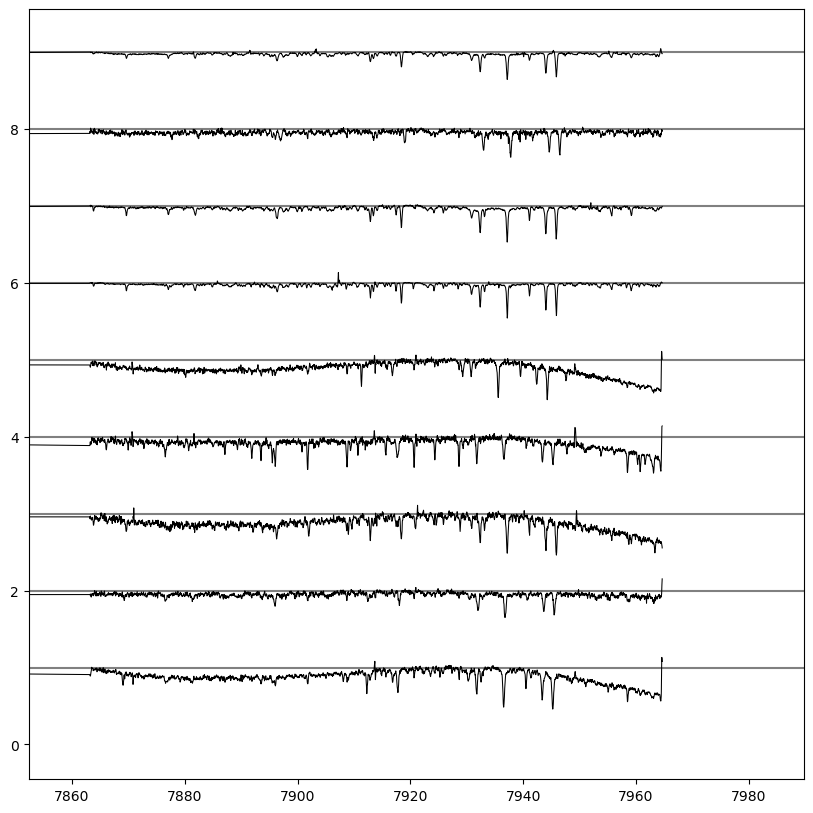

In [9]:
# now I want to plot the first 10 I guess?
flux_df = pd.read_csv('./training_flux.csv')
original_w = fits.open('./data/cks-spectra/cks-k00001_ij122.742.fits')[2].data
for order in original_w:
    print(order[0], order[-1])
    figure(figsize=(10,10))
    c = 0
    for koi in flux_df.columns.to_numpy()[41:50]:
        axhline(1+c, color='grey')
        plot(w, flux_df[koi]+c, 'k-', lw=0.75)
        c+=1
    xlim(order[0], order[-1])

In [ ]:
# note: to my eye it doesn't really look like normalization is the problem?
# maybe it's worse for other spectra?
# maybe I can tell by the parts that are really far from the y=1 line
# is there any way to tell how well spectra are normalized?
# maybe I need to look at a smaller section of the spectrum


# maybe based on the code I used to normalize the spectra?
# maybe I can fit to the max and see how far that one is from all ones?

# let's try 6800-6850

# the last order 7860-7650 definitely looks more poorly normalized
# what about the best normalization? 
# maybe 7070 - 7190, would be my guess.
